In [1]:
import nltk
import pandas as pd

nltk.download('punkt')
nltk.download('wordnet')

DATA_LOAD_FILE = "/Users/typhaine/Documents/Doc_Gorilla/OpenClassroom--Machine-Learning-Engineer/P5/data/StackOverFlow.csv.gz"

df = pd.read_csv(DATA_LOAD_FILE)
df

[nltk_data] Downloading package punkt to /Users/typhaine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/typhaine/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Date,Title,Tags,Score
0,2010-07-21 00:27:42,Iterating over dictionaries using &#39;for&#39...,"python, dictionary",4232
1,2013-05-10 09:04:49,How to iterate over rows in a DataFrame in Pandas,"python, pandas, dataframe, loops",3993
2,2011-06-24 17:55:08,Catch multiple exceptions in one line (except ...,"python, exception",3781
3,2010-08-09 04:52:50,Does Python have a string &#39;contains&#39; s...,"python, string, substring, contains",3587
4,2010-07-08 21:31:22,How do I list all files of a directory?,"python, directory",3466
...,...,...,...,...
245,2014-04-25 15:31:47,Asking the user for input until they give a va...,"python, validation, input",749
246,2010-12-14 02:41:29,How do I append one string to another in Python?,"python, string, append",746
247,2011-04-15 14:22:01,How can I fill out a Python string with spaces?,"python, string, string-formatting, padding",743
248,2015-05-01 04:25:16,Where does pip install its packages?,"python, django, pip, virtualenv",742


In [2]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text

from nltk.tokenize import word_tokenize

def tokenize(text):
    return word_tokenize(text)

from nltk.stem import PorterStemmer

def stem_sentence(sentence):
    stemmer = PorterStemmer()
    return " ".join([stemmer.stem(word) for word in sentence.split()])

from nltk.stem import WordNetLemmatizer

def lemmatize_sentence(sentence):
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in sentence.split()])


In [3]:
df["TitleClean"] = df["Title"].apply(clean_text).apply(stem_sentence).apply(lemmatize_sentence)
df["TitleCleanTokenised"] = df["TitleClean"].apply(tokenize)
df

,Date,Title,Tags,Score,TitleClean,TitleCleanTokenised
0,2010-07-21 00:27:42,Iterating over dictionaries using &#39;for&#39...,"python, dictionary",4232,iter over dictionari use 39for39 loop,"[iter, over, dictionari, use, 39for39, loop]"
1,2013-05-10 09:04:49,How to iterate over rows in a DataFrame in Pandas,"python, pandas, dataframe, loops",3993,how to iter over row in a datafram in panda,"[how, to, iter, over, row, in, a, datafram, in..."
2,2011-06-24 17:55:08,Catch multiple exceptions in one line (except ...,"python, exception",3781,catch multipl except in one line except block,"[catch, multipl, except, in, one, line, except..."
3,2010-08-09 04:52:50,Does Python have a string &#39;contains&#39; s...,"python, string, substring, contains",3587,doe python have a string 39contains39 substr m...,"[doe, python, have, a, string, 39contains39, s..."
4,2010-07-08 21:31:22,How do I list all files of a directory?,"python, directory",3466,how do i list all file of a directori,"[how, do, i, list, all, file, of, a, directori]"
...,...,...,...,...,...,...
245,2014-04-25 15:31:47,Asking the user for input until they give a va...,"python, validation, input",749,ask the user for input until they give a valid...,"[ask, the, user, for, input, until, they, give..."
246,2010-12-14 02:41:29,How do I append one string to another in Python?,"python, string, append",746,how do i append one string to anoth in python,"[how, do, i, append, one, string, to, anoth, i..."
247,2011-04-15 14:22:01,How can I fill out a Python string with spaces?,"python, string, string-formatting, padding",743,how can i fill out a python string with space,"[how, can, i, fill, out, a, python, string, wi..."
248,2015-05-01 04:25:16,Where does pip install its packages?,"python, django, pip, virtualenv",742,where doe pip instal it packag,"[where, doe, pip, instal, it, packag]"


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(min_df=1, lowercase=False)
count_vectorized = count_vectorizer.fit_transform(df["TitleClean"])
count_vectorized.shape

(250, 576)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=2, use_idf=True)
tfidf_vectorized = tfidf_vectorizer.fit_transform(df["TitleClean"])
tfidf_vectorized 

<250x199 sparse matrix of type '<class 'numpy.float64'>'
	with 1546 stored elements in Compressed Sparse Row format>

In [7]:
#from gensim.models import Word2Vec
#sentences = [word_tokenize(clean_text(sentence)) for sentence in df['Title']]
#model_w2v = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)


In [8]:
#from transformers import BertTokenizer, BertModel
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#model = BertModel.from_pretrained("bert-base-uncased")


In [9]:
#import tensorflow_hub as hub

#embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
#embeddings = embed(["sample sentence"])


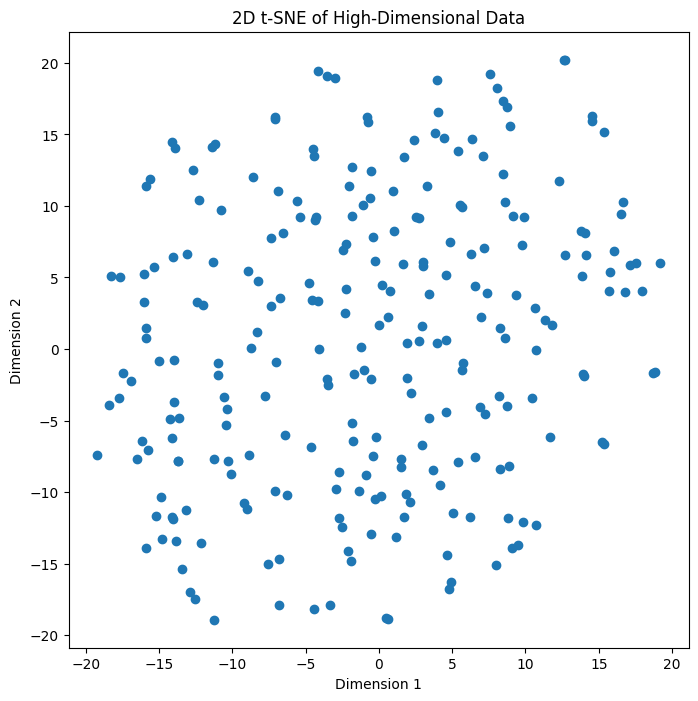

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

high_dim_data = tfidf_vectorized

tsne = TSNE(n_components=2, random_state=42, init="random")
reduced_data_tsne = tsne.fit_transform(high_dim_data)

plt.figure(figsize=(8, 8))
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1])
plt.title('2D t-SNE of High-Dimensional Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


/Users/typhaine/Documents/Doc_Gorilla/OpenClassroom--Machine-Learning-Engineer/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/typhaine/Documents/Doc_Gorilla/OpenClassroom--Machine-Learning-Engineer/.venv/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


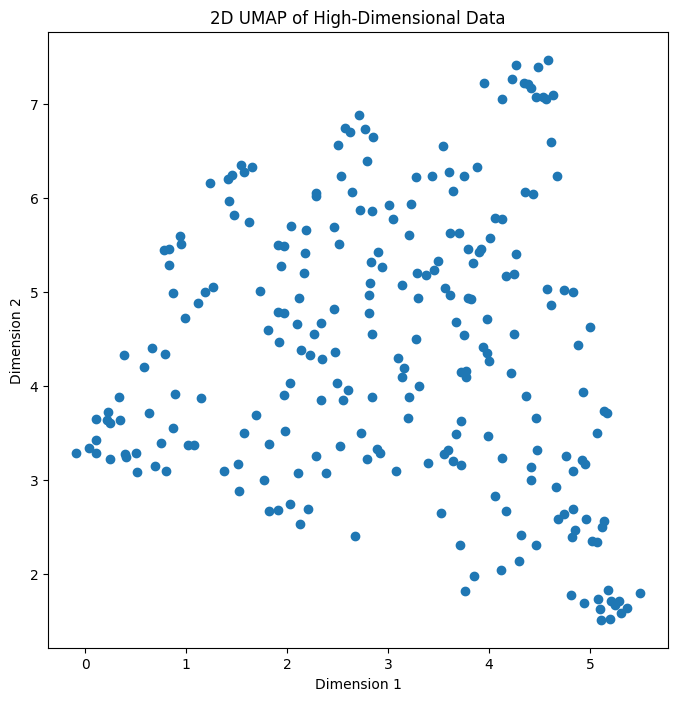

In [13]:
import umap

reducer = umap.UMAP()
reduced_data_umap = reducer.fit_transform(high_dim_data)

plt.figure(figsize=(8, 8))
plt.scatter(reduced_data_umap[:, 0], reduced_data_umap[:, 1])
plt.title('2D UMAP of High-Dimensional Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


In [ ]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Assuming `X` is your feature matrix and `y` is your target labels
#lda = LDA(n_components=2)
#X_lda = lda.fit_transform(X, y)


In [14]:
from sklearn.decomposition import PCA

# Assuming `high_dim_data` is your high-dimensional data
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(high_dim_data)

plt.figure(figsize=(8, 8))
plt.scatter(reduced_data_pca[:, 0], reduced_data_pca[:, 1])
plt.title('2D PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.